In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Загрузка датасета
data = load_breast_cancer()
X, y = data.data, data.target

# Разделение на обучающий и тестовый наборы данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

SVM с ядром 'linear': ROC AUC: 0.9963969865705863, F1: 0.9645390070921985


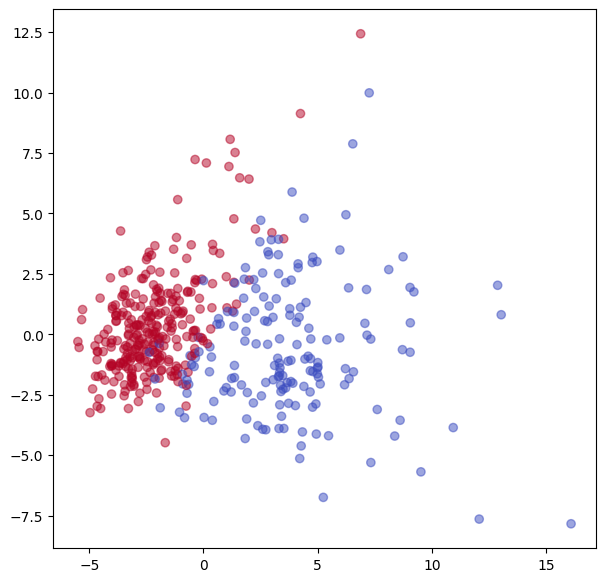

In [10]:
# Обучение модели SVM с ядром "linear"
svm_linear = SVC(kernel="linear", probability=True)
svm_linear.fit(X_train, y_train)

# Визуализация границы принятия решений для SVM с ядром "linear"
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
plt.figure(figsize=(7, 7))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, alpha=0.5, cmap="coolwarm")

# Оценка качества модели SVM с ядром "linear"
auc = roc_auc_score(y_test, svm_linear.predict_proba(X_test)[:, 1])
f1 = f1_score(y_test, svm_linear.predict(X_test))
print(f"SVM с ядром 'linear': ROC AUC: {auc}, F1: {f1}")

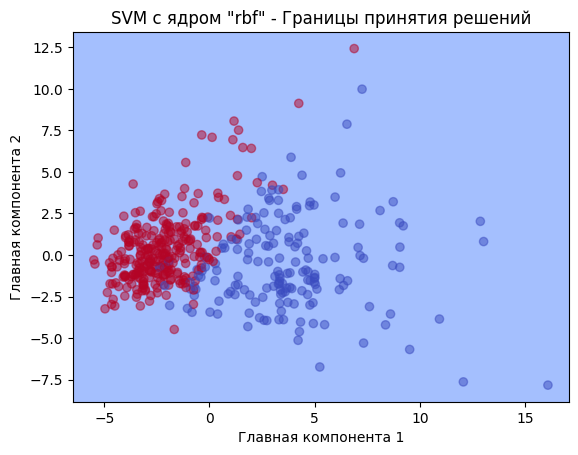

SVM с ядром 'rbf': ROC AUC: 0.99737962659679, F1: 0.9861111111111112


In [18]:
# Обучение модели SVM с ядром "rbf"
svm_rbf = SVC(kernel="rbf", probability=True)
svm_rbf.fit(X_train, y_train)

# Создание сетки точек
h = .02  # шаг сетки
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Преобразование точек сетки обратно в исходное пространство признаков
meshgrid_original = pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()])

# Обратное преобразование с использованием масштабирования
meshgrid_scaled = scaler.inverse_transform(meshgrid_original)

# Предсказание классов для точек сетки
Z = svm_rbf.predict(meshgrid_scaled)
Z = Z.reshape(xx.shape)

# Построение контурной диаграммы
plt.contourf(xx, yy, Z, alpha=0.8, cmap="coolwarm")
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, alpha=0.5, cmap="coolwarm")
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('SVM с ядром "rbf" - Границы принятия решений')
plt.show()

# Оценка качества модели SVM с ядром "rbf"
auc = roc_auc_score(y_test, svm_rbf.predict_proba(X_test)[:, 1])
f1 = f1_score(y_test, svm_rbf.predict(X_test))
print(f"SVM с ядром 'rbf': ROC AUC: {auc}, F1: {f1}")


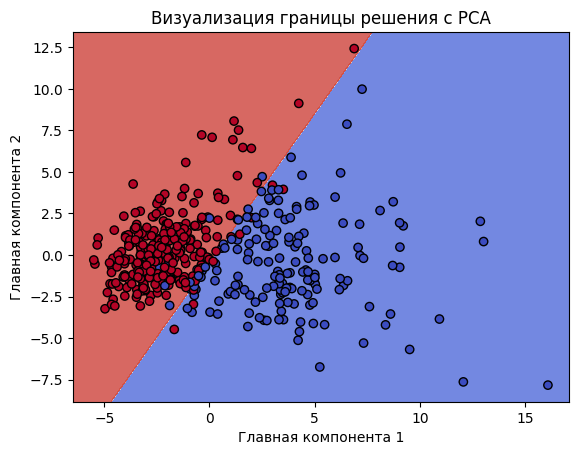

Логистическая регрессия: ROC AUC: 0.99737962659679, F1: 0.979020979020979


In [17]:
# Обучение модели логистической регрессии
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Применение PCA для уменьшения данных до 2 измерений
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Обучение модели логистической регрессии на уменьшенных данных
logreg_pca = LogisticRegression()
logreg_pca.fit(X_train_pca, y_train)

# Создание сетки для визуализации
h = .02  # размер шага в сетке
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Предсказание класса для каждой точки в сетке
Z = logreg_pca.predict(np.c_[xx.ravel(), yy.ravel()])

# Изменение предсказаний для создания сетки предсказаний
Z = Z.reshape(xx.shape)

# Построение границы решения и точек обучающей выборки
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('Визуализация границы решения с PCA')

# Показать график
plt.show()

# Оценка качества модели логистической регрессии
auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])
f1 = f1_score(y_test, logreg.predict(X_test))
print(f"Логистическая регрессия: ROC AUC: {auc}, F1: {f1}")
